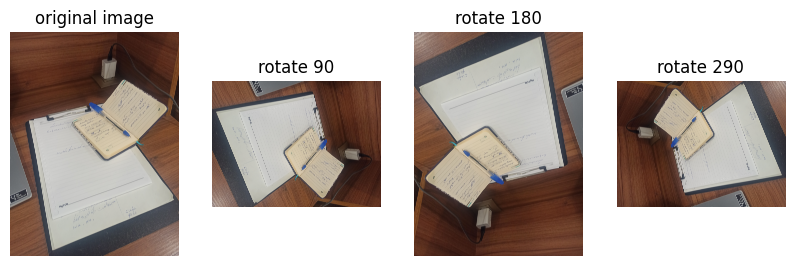

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# read image
img = cv.imread('desk.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# create image rotate
img_90 = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
img_180 = cv.rotate(img, cv.ROTATE_180)
img_270 = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)

# display image rotated
plt.figure(figsize=(10, 8))
plt.subplot(141); plt.imshow(img); plt.title("original image"); plt.axis("off")
plt.subplot(142); plt.imshow(img_90); plt.title("rotate 90"); plt.axis("off")
plt.subplot(143); plt.imshow(img_180); plt.title("rotate 180"); plt.axis("off")
plt.subplot(144); plt.imshow(img_270); plt.title("rotate 290"); plt.axis("off")
plt.show()

In [2]:
def match_images(img1, img2):
    # extract key point
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    
    # maching
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    
    # result filter
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
    
    return kp1, kp2, good_matches


--- process ---


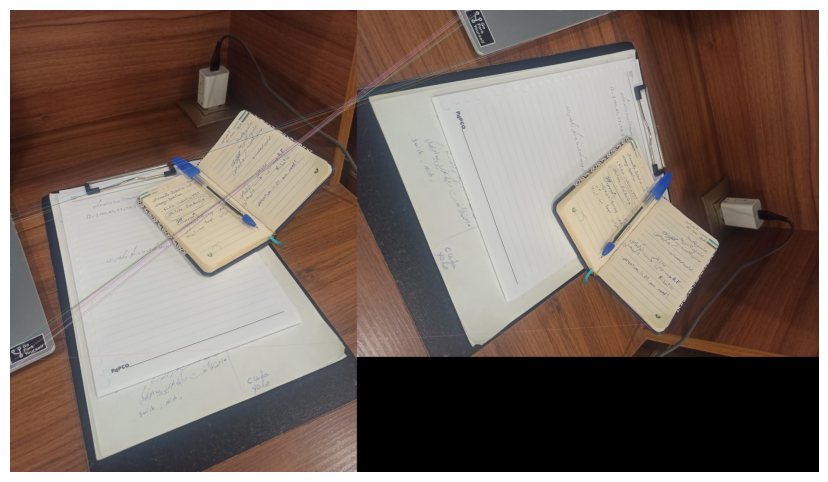

number of success matching: 9795

--- process ---


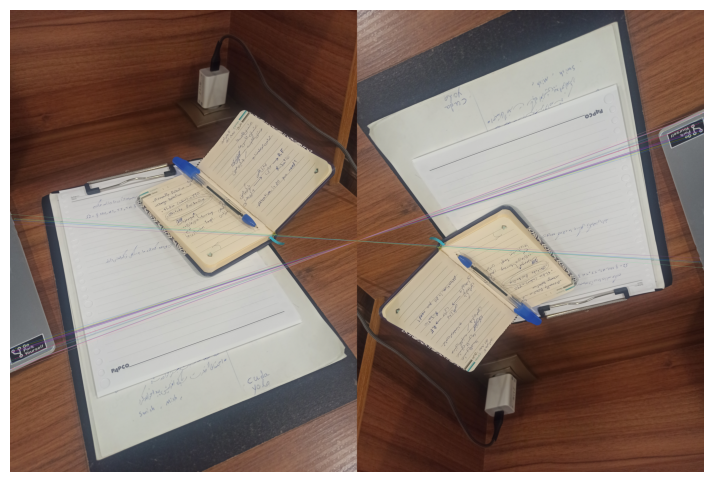

number of success matching: 9712

--- process ---


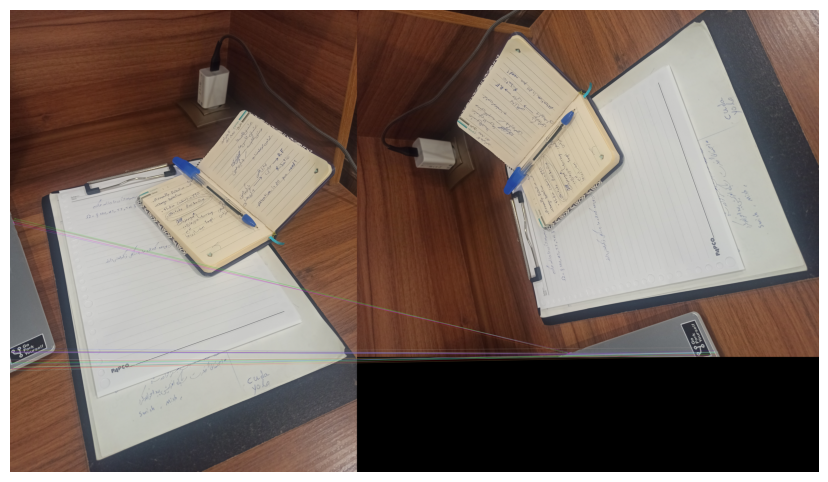

number of success matching: 9828


In [3]:
# image list
images = [
    (img_90),
    (img_180), 
    (img_270)
]

# process image
for rotated_img in images:
    print("\n--- process ---")
    
    # image matching
    kp1, kp2, good_matches = match_images(img, rotated_img)
    
    # display result
    matched_img = cv.drawMatches(
        img, kp1, 
        rotated_img, kp2, 
        good_matches[:30], 
        None, 
        flags=2
    )
    
    # show matching
    plt.figure(figsize=(12, 6))
    plt.imshow(matched_img)
    plt.axis('off')
    plt.show()
    
    print(f"number of success matching: {len(good_matches)}")